### Imports iniciais necessários

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as df

# Faturamento das lojas Offline

In [313]:
#Carregando os dados de vendas offline salvos na pasta Data
df_off_sales = pd.read_json('/home/jair_rapids/PycharmProjects/Teste_Linx/Data/offline_sales.json', lines=True, orient='records')

In [314]:
#Checando o Dataframe
df_off_sales.head()

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id
0,2018-08-01,RN,3162633,323932636465316,643839313230323,1,279.0,NaN
1,2018-08-01,RN,3162633,326463633336323,613665646663346,1,229.0,NaN
2,2018-08-01,RN,3162633,333331346330323,343739666265353,1,179.0,NaN
3,2018-08-01,RN,3162633,393461383633336,373034633762613,1,269.0,NaN
4,2018-08-01,RN,3162633,616531626536373,343634373062363,1,29.0,NaN


## Codigo para responder a 3 pergunta

In [188]:
df_rj = pd.DataFrame(df_off_sales[df_off_sales['state'] == 'RJ'])

In [217]:
#vendas do Rio de Janeiro total do mes de agosto de 2018
vendas_rj = df_rj.shape[0]
print(vendas_rj)

8867


In [199]:
from pandas.tseries.offsets import BDay

In [210]:
df_weekend = df_rj[df_rj.date.dt.dayofweek >=5]

In [221]:
vendas_final_semana = df_weekend.shape[0]
print("Total de vendas Final de semana = ", vendas_final_semana)

Total de vendas Final de semana =  1723


In [220]:
#Numero de vendas de segunda a sexta em agosto de 2018 no rio de janeiro
v_s_s_rj = vendas_rj - vendas_final_semana
print("Total vende vendas de segunda a sexta no mes de agosto = ", v_s_s_rj)

Total vende vendas de segunda a sexta no mes de agosto =  7144


In [222]:
#Media de vendas por dias se segunda a sexta em agosto 
media_vendas_dia_semana_rj = v_s_s_rj/5
print("Media de vendas por dia de segunda a sexta no RJ = ", media_vendas_dia_semana_rj)


Media de vendas por dia de segunda a sexta no RJ =  1428.8


In [224]:
#Media de vendas de finais de semana
media_weekend_rj = vendas_final_semana/2
print("Media de vendas por dia de final de semana no RJ = ", media_weekend_rj)

Media de vendas por dia de final de semana no RJ =  861.5


In [213]:
df_weekend.tail()

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id,Total
25961,2018-08-26,RJ,6635613,653631343935643,373833386334646,1,1298.0,3.131396e+19,1298.0
25962,2018-08-26,RJ,6635613,633137353035353,383463623633323,2,158.0,3.163624e+19,316.0
25963,2018-08-26,RJ,6635613,633137353035353,643338383935343,1,158.0,3.163624e+19,158.0
25964,2018-08-26,RJ,6635613,363062653032653,303566313838376,1,299.0,3.264326e+19,299.0
25965,2018-08-26,RJ,6635613,363062653032653,313937353132383,1,558.0,3.264326e+19,558.0


In [107]:
df_rj['store_id'].unique().shape[0]

1

In [108]:
#Conferindo o final para ver o periodo total
df_off_sales.tail()

,date,state,store_id,sale_id,off_product_id,quantity,price,customer_id
29367,2018-08-31,RS,6637353,633064386463376,346433376135623,1,129.0,6.439626e+19
29368,2018-08-31,RS,6637353,633064386463376,633239313036316,1,138.0,6.439626e+19
29369,2018-08-31,RS,6637353,393832393138626,333938616133373,1,149.0,6.632647e+19
29370,2018-08-31,RS,6637353,393832393138626,366337303963646,1,109.0,6.632647e+19
29371,2018-08-31,RS,6637353,393832393138626,393961643766636,1,134.5,6.632647e+19


In [109]:
df_off_sales.shape

(29372, 8)

In [110]:
#Criando uma coluna para calcular o total de vendas, visto que alguns clientes podem ter comprado mais de 1 produto
df_off_sales['Total'] = df_off_sales.quantity * df_off_sales.price

In [111]:
#Cheganco a soma dos produtos para comparar com o total
df_off_sales.price.sum()

13747940.13

In [143]:
#Conferindo o total de vendas offline
total_vendas_offline = df_off_sales.Total.sum()
print(total_vendas_offline)

13903005.32


In [112]:
#Vemos que a diferença é nao é tao grande em contar os preços ou os preços pela quantidade, entao vamos conferir quantos produtos sao vendidos mais de 1 e sentir se esta certo
df_off_sales.quantity.value_counts()

1    28784
2      531
3       43
4       10
5        2
9        1
6        1
Name: quantity, dtype: int64

In [114]:
print(total_vendas_offline)

13903005.32


In [115]:
#Estados onde a empresa tem filial
df_off_sales.state.unique()

array(['RN', 'RJ', 'SP', 'PR', 'RS', 'PE', 'AM', 'MS', 'PI', 'GO', 'MA'],
      dtype=object)

In [116]:
#Verificando volume de vendas de cada estado
venda_por_estado = pd.DataFrame(df_off_sales.groupby('state')[['quantity', 'Total']].sum())

In [316]:
venda_por_estado.head(20)


,state,quantity,Total,N_filiais,Regiao,Fat_medio_p_filial,Ticket_Medio
0,AM,1554,419683.69,2.0,NORTE,209841.845000,270.066725
1,GO,305,169031.07,1.0,CENTRO-OESTE,169031.070000,554.200230
2,MA,1089,233179.79,1.0,NORDESTE,233179.790000,214.122856
3,MS,369,258786.00,1.0,CENTRO-OESTE,258786.000000,701.317073
4,PE,3410,1115851.47,3.0,NORDESTE,371950.490000,327.229170
5,PI,846,172420.00,1.0,NORDESTE,172420.000000,203.806147
6,PR,903,627028.80,3.0,SUL,209009.600000,694.384053
7,RJ,9103,6257418.50,13.0,SUDESTE,481339.884615,687.401791
8,RN,1506,296840.20,1.0,NORDESTE,296840.200000,197.105046
9,RS,4681,1328505.62,3.0,SUL,442835.206667,283.808079


In [121]:
venda_por_estado.reset_index(inplace=True)

In [122]:
#Dicionario com as regiões do Brasil para inserir no df de report
regioes = {'SUL':['SC','RS','PR'],
           'SUDESTE':['SP','RJ', 'MG', 'ES'],
           'NORTE':['AC','AM', 'RR', 'PA', 'TO','RO'],
           'CENTRO-OESTE':['MT','MS','GO'],
           'SUL':['PR','RS','SC'],
           'NORDESTE':['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']}

In [123]:
#Criando a coluna de vendas por filiais
venda_por_estado['N_filiais'] = np.NaN
for (index, row ) in venda_por_estado.iterrows():
        df = df_off_sales[df_off_sales['state'] == row['state']]
        venda_por_estado.loc[index,'N_filiais'] = df['store_id'].value_counts().shape[0]
    
    

In [124]:
#Criando a coluna de regioes
venda_por_estado['Regiao'] = np.NaN
for (index,row) in venda_por_estado.iterrows():
    for regiao in regioes:
        if any(state == row['state'] for state in regioes[regiao]):
            venda_por_estado.loc[index,'Regiao'] = regiao
    

In [125]:
#Coluna de faturamento Medio por Filial
venda_por_estado['Fat_medio_p_filial'] = venda_por_estado.Total / venda_por_estado.N_filiais

In [126]:
#Coluna de Ticket medio por estado
venda_por_estado['Ticket_Medio'] = venda_por_estado.Total/venda_por_estado.quantity

## Hora de dar uma checada no que temos, visualmente

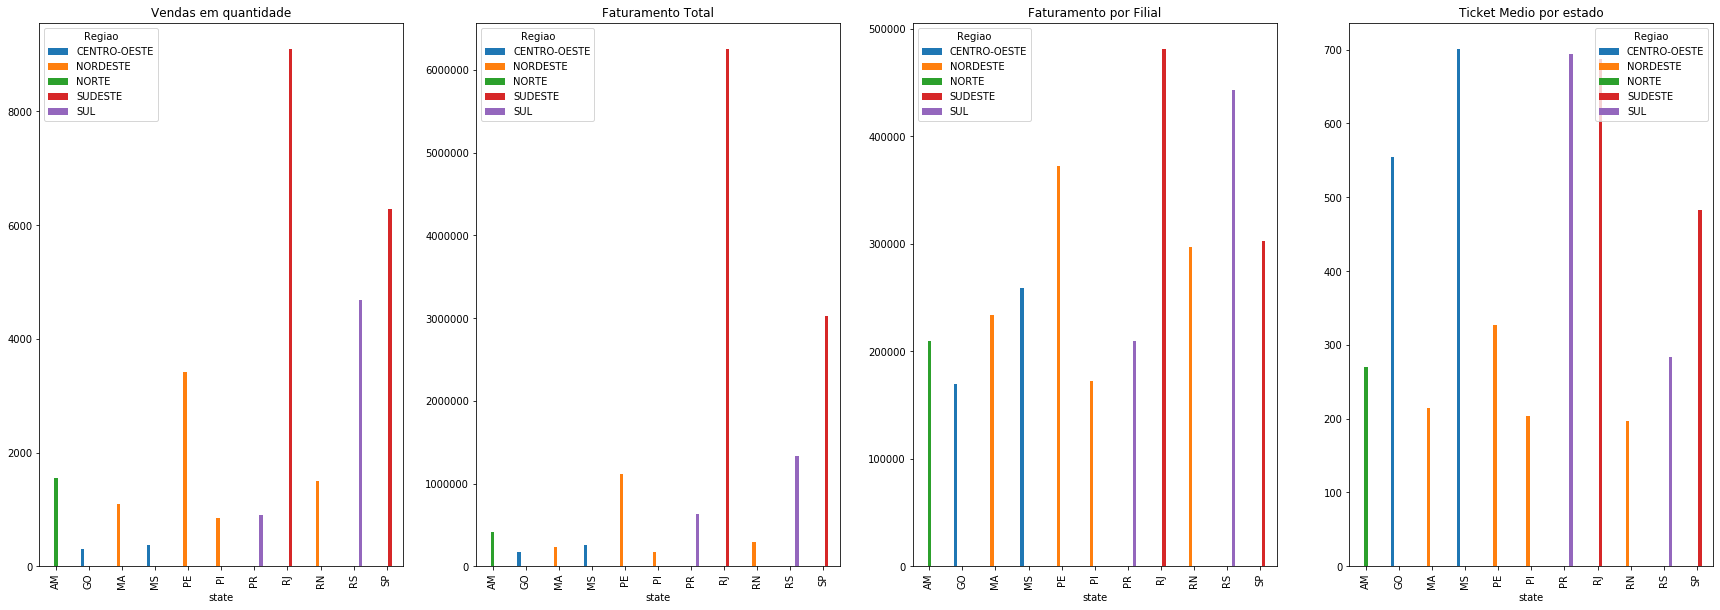

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30,10))

#Venda por estado em quantidade
venda_por_estado.sort_values(by=['quantity']).pivot('state','Regiao','quantity').plot(ax= axes[0],kind='bar', title='Vendas em quantidade')
#venda_por_estado.plot(ax = axes[0], kind='bar', x='state', color='green', title='Vendas em quantidade de produtos')
venda_por_estado.pivot('state','Regiao','Total').plot(ax= axes[1],kind='bar', title='Faturamento Total')
venda_por_estado.pivot('state','Regiao','Fat_medio_p_filial').plot(ax= axes[2],kind='bar', title='Faturamento por Filial')
venda_por_estado.pivot('state','Regiao','Ticket_Medio').plot(ax= axes[3],kind='bar', title='Ticket Medio por estado')

# Insides Vendas Offline 

### 1- Vemos que o Rio Grande do Sul tem o segundo maior faturamento por filial de todos os estados seguido de Pernanbuco, embora o ticket medio dos 2 estejam entre os menores, eles tem a 3 e 4 posicao na maior quantidade de vendas, mesmo tendo apenas 3 filiais.
## Eu recomendaria fortemente investimento na região e uma pesquisa de como subir o ticket medio ja que as lojas ja vendem bem
### 2 -Região Sudeste lidera o faturamento total com Rio De Janeiro na ponta contado com Mais lojas(13), um otimo ticket medio, e São Paulo Logo Atras com 10 lojas, porem com um faturamento por filial bem menor.
### 3 - Regiao Centro-Oeste tem 2 filiais, 1 por estado, e embora o faturamento por filial nao seja tao espressivo como Rj,Rs, SP ou PE, tem um alto ticket médio oque pode ser um grande chance de lucro.

## Confirmação do Insight

In [135]:
#Vamos verificar se onde deve ser investido em novas lojas, gerando um dataframe por região
vendas_regiao = venda_por_estado.groupby('Regiao')['quantity', 'N_filiais'].sum()

In [136]:
vendas_regiao.head(10)

,quantity,N_filiais
Regiao,,
CENTRO-OESTE,674,2.0
NORDESTE,6851,6.0
NORTE,1554,2.0
SUDESTE,15377,23.0
SUL,5584,6.0


In [137]:
#Vamos ver a quantidade de vendas por filial em cada região
vendas_regiao['Qtd_v_p_filiais'] = vendas_regiao.quantity/vendas_regiao.N_filiais

In [142]:
vendas_regiao.sort_values(by='Qtd_v_p_filiais')

,quantity,N_filiais,Qtd_v_p_filiais
Regiao,,,
CENTRO-OESTE,674,2.0,337.000000
SUDESTE,15377,23.0,668.565217
NORTE,1554,2.0,777.000000
SUL,5584,6.0,930.666667
NORDESTE,6851,6.0,1141.833333


## Confirmamos que o Nordeste e o Sul que tem as melhores quantidades de vendas por loja tem apenas aproximadamente 1/4 de lojas do sudeste, talvez pela Matriz ser no sudeste (possibilidade ja que nao sei que rede de lojas é)

# Analise Online

In [239]:
#Carregando os dados
#coloque aqui o caminho onde salvou o json ou csv
path_online_orders ='/home/jair_rapids/PycharmProjects/Teste_Linx/Data/online_orders.json'
df_online_orders = pd.read_json(path_online_orders, lines=True, orient='records')

In [227]:
df_online_orders.head()

,date,visitor_id,deviceType,order_id,on_product_id,quantity,price,customer_id
0,2018-08-01,3.663324e+24,desktop,363063373630306,323762666337343,1,839,NaN
1,2018-08-01,3.430317e+24,mobile,356664366366353,313562333039323,1,629,6.339334e+19
2,2018-08-01,3.261343e+24,desktop,313432656633333,383863346531623,1,219,3.765363e+19
3,2018-08-01,6.437387e+24,mobile,633236633438383,666136386663626,1,239,6.533383e+19
4,2018-08-01,6.264657e+24,desktop,623030326130383,626533383465323,1,69,NaN


In [228]:
df_online_orders.shape

(12237, 8)

In [229]:
df_online_orders.on_product_id.value_counts()

626664333563363    74
656136316465643    50
376531636530353    50
396464373131666    47
393665363031353    45
                   ..
643161333961346     1
656535323731333     1
626331343133353     1
383432356665383     1
313232346634653     1
Name: on_product_id, Length: 2184, dtype: int64

In [230]:
faturamento_online = sum(df_online_orders.quantity * df_online_orders.price)
print(faturamento_online)

5649323


In [231]:
#Total de vendas online +offline, oque responde a primeira pergunta
faturamento_total_on_off = faturamento_online + total_vendas_offline
print(faturamento_total_on_off)

19552328.32


In [232]:
#Verificando dados NaN para responder a segunda pergunta
df_online_orders['on_product_id'].isna().sum()

0

In [233]:
#verificando dados nulos para responder a segunda pergunta
df_online_orders['on_product_id'].isnull().sum()

0

In [179]:
df_produto = pd.DataFrame(df_online_orders.groupby('on_product_id')['quantity'].sum())
df_produto.shape


(2184, 1)

In [180]:
df_produto.head()

,quantity
on_product_id,
303038303931323,2
303062656662333,21
303063623230393,4
303133353935633,3
303165306164386,1


In [181]:
df_produto.reset_index(inplace=True)

In [182]:
#Produto Online mais comprado
df_produto.max()

on_product_id    666665316332663
quantity                      74
dtype: int64

## Online pageview

In [296]:
#Carregando os dados
#coloque aqui o caminho onde salvou o json ou csv
path_online_pageviews ='/home/jair_rapids/PycharmProjects/Teste_Linx/Data/online_pageviews.json'
df_online_pageviews = pd.read_json(path_online_pageviews, lines=True, orient='records')

In [297]:
df_online_pageviews.tail(20)

,date,visitor_id,deviceType,pageType,category_id,on_product_id,customer_id
3452520,2018-08-31,6.561623e+24,desktop,subcategory,3.733386e+09,NaN,NaN
3452521,2018-08-31,3.939616e+24,mobile,cart,NaN,NaN,NaN
3452522,2018-08-31,6.334664e+24,desktop,subcategory,3.330346e+09,NaN,NaN
3452523,2018-08-31,3.261377e+24,mobile,home,NaN,NaN,NaN
3452524,2018-08-31,3.638303e+24,desktop,subcategory,3.161653e+09,NaN,NaN
3452525,2018-08-31,6.437613e+24,desktop,product,3.363397e+09,6.163614e+14,NaN
3452526,2018-08-31,6.434303e+24,desktop,landing_page,NaN,NaN,NaN
3452527,2018-08-31,6.366653e+24,mobile,product,3.331663e+09,3.530383e+14,NaN
3452528,2018-08-31,6.163394e+24,mobile,product,6.539374e+09,6.239613e+14,NaN
3452529,2018-08-31,6.465303e+24,mobile,home,NaN,NaN,NaN


In [295]:
df_online_pageviews.shape

(20993, 7)

In [250]:
df_online_pageviews.customer_id.isna().sum()

3371775

In [266]:
df_pageview_nona = df_online_pageviews[df_online_pageviews.customer_id.notnull()]

In [268]:
df_pageview_nona.shape

(20993, 7)

In [270]:
df_pageview_nona.head()

,date,visitor_id,deviceType,pageType,category_id,on_product_id,customer_id
105,2018-08-01,3.832637e+24,mobile,product,6.365313e+09,3.232393e+14,3.334316e+19
234,2018-08-01,6.339633e+24,desktop,product,6.330623e+09,3.330304e+14,3.235393e+19
569,2018-08-02,3.662633e+24,mobile,product,6.139644e+09,6.261364e+14,6.632364e+19
795,2018-08-02,3.264626e+24,desktop,product,6.465324e+09,6.435303e+14,3.731354e+19
1319,2018-08-04,3.335317e+24,desktop,product,3.663346e+09,3.638374e+14,3.561334e+19


In [279]:
customer_id_pageview = df_pageview_nona.customer_id.unique()

In [280]:
customer_id_pageview.shape

(1901,)

In [287]:
mesmosconsumidores = 0
for (index, row) in df_off_sales.iterrows():
    if row['customer_id'] in customer_id_pageview:
        mesmosconsumidores+=1

In [288]:
mesmosconsumidores

685

### Tentando responder a ultima pergunta

In [312]:
#Verificando quantas pessoas foram ate o carrinho
df_online_pageviews['pageType'].value_counts()

product         1415853
subcategory      689586
home             381654
category         344513
landing_page     275505
search            94510
not_found         87938
other             75302
cart              30203
emptysearch       29618
checkout          17332
confirmation       8351
userprofile        2058
topqueries          117
Name: pageType, dtype: int64

In [299]:
#Criando um DataFrame separado somente com quem foi para o carrinho
on_cart = df_online_pageviews[df_online_pageviews['pageType'] == 'cart']

In [300]:
#Verificando o shape
on_cart.shape

(30203, 7)

In [302]:
on_cart_total = on_cart.shape[0]


In [305]:
#Veirificando a quantidade de vendas que foram feitas
df_online_orders.shape
online_compras_t = df_online_orders.shape[0]

In [306]:
#QUantas pessoas foram ate o carrinho e nao compraram
cart_no_buy = on_cart_total - online_compras_t

In [310]:
print(f"{on_cart_total} pessoas chegaram ao carrinho, mas somente {online_compras_t} realmente compraram, entao temos ai {cart_no_buy} de pessoas para alvo de campanha")

30203 pessoas chegaram ao carrinho, mas somente 12237 realmente compraram, entao temos ai 17966 de pessoas para alvo de campanha
